In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

Loading wikipedia dataset which contains information about movies.


In [3]:
wiki = pd.read_csv('wiki_movie_plots_deduped.csv')
wiki.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [4]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(token_pattern=r"(?u)\b\w+\b", stop_words=None, max_features=10000)
WCmatrix = vectorizer.fit_transform(wiki["Plot"])
WCmatrix

<34886x10000 sparse matrix of type '<class 'numpy.int64'>'
	with 5759797 stored elements in Compressed Sparse Row format>

We will try to find nearest neighbors of the movie "The Lord of the Rings: The Fellowship of the Ring" page.

In [5]:
from sklearn.metrics import pairwise_distances

dist = pairwise_distances(WCmatrix[wiki[wiki["Title"] == "The Lord of the Rings: The Fellowship of the Ring"].index], WCmatrix)

wiki["BO-eucl"] = dist.T
wiki.sort_values(by='BO-eucl').iloc[:10]

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,BO-eucl
13896,2001,The Lord of the Rings: The Fellowship of the Ring,American,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Sean Ast...",fantasy,https://en.wikipedia.org/wiki/The_Lord_of_the_...,"In the Second Age of Middle-earth, the lords o...",0.000000
9513,1978,The Lord of the Rings,American,Ralph Bakshi,"Voices of John Hurt, Billy Barty","fantasy, animated",https://en.wikipedia.org/wiki/The_Lord_of_the_...,"Early in the Second Age of Middle-earth, elven...",32.710854
14093,2002,The Lord of the Rings: The Two Towers,American,Peter Jackson,"Elijah Wood, Ian McKellen, Liv Tyler, Viggo Mo...","adventure, fantasy",https://en.wikipedia.org/wiki/The_Lord_of_the_...,After awakening from a dream of Gandalf the Gr...,34.322005
33871,2016,Kingsglaive: Final Fantasy XV,Japanese,Takeshi Nozue,"Gō Ayano, Shiori Kutsuna, Tsutomu Isobe, Shōzō...","fantasy, action, comedy, comedy-drama, drama, ...",https://en.wikipedia.org/wiki/Kingsglaive:_Fin...,"During a visit to Tenebrae, Regis and Noctis—w...",36.565011
16549,2013,"Hobbit: The Desolation of Smaug, TheThe Hobbit...",American,Peter Jackson,"Ian McKellen, Martin Freeman, Benedict Cumberb...","adventure, fantasy",https://en.wikipedia.org/wiki/The_Hobbit:_The_...,Thorin and his company are being pursued by Az...,37.309516
33911,2017,Doubutsu Sentai Zyuohger vs. Ninninger the Mov...,Japanese,Noboru Takemoto,"Masaki Nakao, Miki Yanagi, Shohei Nanba, Tsuru...","drama, tokusatsu, action, sci-fi",https://en.wikipedia.org/wiki/Doubutsu_Sentai_...,The film begins with a boy desperate at the si...,37.629775
15973,2011,The Adventures of Tintin: The Secret of the Un...,American,Steven Spielberg,"Jamie Bell, Andy Serkis, Daniel Craig, Simon P...","action-adventure, fantasy",https://en.wikipedia.org/wiki/The_Adventures_o...,Young journalist Tintin and his dog Snowy are ...,38.768544
18571,1941,49th Parallel,British,Michael Powell,"Eric Portman, Laurence Olivier, Leslie Howard",world war ii,https://en.wikipedia.org/wiki/49th_Parallel_(f...,"Early in World War II, U-37, a German U-boat m...",38.781439
33862,2016,Yu-Gi-Oh!: The Dark Side of Dimensions,Japanese,Satoshi Kuwabara,"Shunsuke Kazama, Kenjiro Tsuda, Hiroki Takahas...","fantasy, action, science fantasy, sci-fi",https://en.wikipedia.org/wiki/Yu-Gi-Oh!:_The_D...,"In the opening, KaibaCorp is doing research on...",39.357337
15405,2008,The Chronicles of Narnia: Prince Caspian,American,Andrew Adamson,"Ben Barnes, William Moseley, Anna Popplewell, ...",fantasy,https://en.wikipedia.org/wiki/The_Chronicles_o...,"In Narnia, almost 1300 years after the Pevensi...",39.446166


Measuring the pairwise distance between the Wikipedia pages of "The Lord of the Rings: The Fellowship of the Ring", "The Lord of the Rings", "The Lord of the Rings: The Two Towers":

In [6]:
pair = wiki[(wiki["Title"] == "The Lord of the Rings: The Fellowship of the Ring") | (wiki["Title"] == "The Lord of the Rings") | (wiki["Title"] == "The Lord of the Rings: The Two Towers")]
pair_v = WCmatrix[pair.index]
dist = pairwise_distances(pair_v)
print(dist[1, 0])   #The Lord of the Rings: The Fellowship of the Ring - The Lord of the Rings
print(dist[2, 0])   #The Lord of the Rings: The Fellowship of the Ring - The Lord of the Rings: The Two Towers
print(dist[2, 1])   #The Lord of the Rings - The Lord of the Rings: The Two Towers

print("The smallest distance is between The Lord of the Rings: The Fellowship of the Ring and The Lord of the Rings: The Two Towers")

32.71085446759225
32.0624390837628
34.322004603461025
The smallest distance is between The Lord of the Rings: The Fellowship of the Ring and The Lord of the Rings: The Two Towers


In [7]:
def top_words(name):

    df = pd.DataFrame(wiki[wiki["Title"] == name]["Plot"].values[0].split(), columns=["word"])
    count = df["word"].value_counts()
    df = count.to_frame("count")
    
    return df.sort_values(by='count',ascending=False).head(20)

In [8]:
L1_words = top_words('The Lord of the Rings: The Fellowship of the Ring')
L1_words

,count
the,40
to,32
and,30
of,17
by,17
a,12
his,12
Frodo,10
Gandalf,10
it,9


In [9]:
L2_words = top_words('The Lord of the Rings: The Two Towers')
L2_words

,count
the,45
and,23
to,22
of,17
by,13
a,9
Frodo,9
is,6
in,6
but,6


In two parts of "The Lord of the Rings" pages we can find many same words, especially names. That is why they are close neighbors.

Now let's use TF-IDF to decrease bad impact of the most frequent words.

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer   #Let's use TfidfVectorizer this time

tfidf = TfidfVectorizer(min_df = 5, max_df = 0.95, max_features = 5000, stop_words = 'english')
tfidf.fit(wiki.Plot)
TFIDFmatrix = tfidf.transform(wiki.Plot)

In [11]:
dist = pairwise_distances(TFIDFmatrix[wiki[wiki.Title == "The Lord of the Rings: The Fellowship of the Ring"].index], TFIDFmatrix)
wiki['BO-eucl-TF-IDF'] = dist.T
wiki[['Title', 'BO-eucl-TF-IDF']].sort_values(by='BO-eucl-TF-IDF').iloc[:10]

,Title,BO-eucl-TF-IDF
13896,The Lord of the Rings: The Fellowship of the Ring,0.000000
9513,The Lord of the Rings,0.773048
14303,The Lord of the Rings: The Return of the King,0.970601
25204,Haathkadi,1.000000
18193,Josser on the River,1.000000
18380,If I Were Rich,1.000000
33871,Kingsglaive: Final Fantasy XV,1.031339
9759,The Return of the King,1.036072
25362,Maa Kasam,1.055767
9296,The Shaggy D.A.,1.114754


The distances looks a bit different. Now the smallest distance is between "The Lord of the Rings: The Fellowship of the Ring"	and "The Lord of the Rings".

Now, I will use TFIDF vectorizer and MiniBatchKmeans to perform some simple clustering.

To specify appropiate number of clusters I will make plot of the SSE (Sum Squared Error) for a range of cluster sizes.

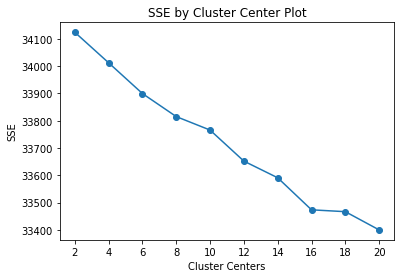

In [12]:
from sklearn.cluster import MiniBatchKMeans

def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(TFIDFmatrix, 20)

I chose 16 clusters, becouse since 16 SSE begins to be more stable.

In [13]:
clusters = MiniBatchKMeans(n_clusters=16, init_size=1024, batch_size=2048, random_state=20).fit_predict(TFIDFmatrix)

Here I ploted the clusters generated by KMeans operation. One plot uses PCA which is better at capturing global structure of the data. The other uses TSNE which is better at capturing relations between neighbors.

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:593: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


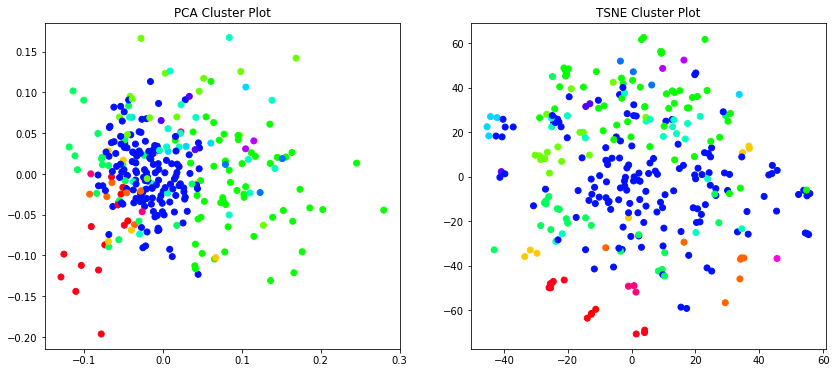

In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.cm as cm


def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=3000, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=300, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    
plot_tsne_pca(TFIDFmatrix, clusters)

In this part I will find the most frequent keywords grouped by the cluster label.

In [15]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
            
get_top_keywords(TFIDFmatrix, clusters, tfidf.get_feature_names(), 10)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)



Cluster 0
frank,love,wife,mary,tells,home,life,new,father,jack

Cluster 1
police,home,man,father,new,eddie,tommy,nick,charlie,jim

Cluster 2
mother,home,new,town,wife,father,jake,billy,mary,john

Cluster 3
time,new,father,love,home,wife,helen,man,peter,harry

Cluster 4
love,played,role,revolves,based,family,movie,life,story,film

Cluster 5
brother,house,marriage,daughter,mother,son,village,love,family,father

Cluster 6
world,men,crew,british,german,earth,captain,army,ship,war

Cluster 7
boy,life,falls,island,story,woman,man,love,girl,young

Cluster 8
throne,father,love,son,palace,queen,kingdom,princess,prince,king

Cluster 9
mother,brother,family,radha,son,father,love,vijay,raj,ravi

Cluster 10
house,time,money,life,father,home,wife,man,new,police

Cluster 11
village,radha,daughter,son,father,love,rao,mohan,krishna,raja

Cluster 12
story,family,priya,father,police,singh,love,nandini,surya,arjun

Cluster 13
town,house,family,man,father,love,alice,wife,new,george

Cluster 14
police,goes